In [5]:
import pandas as pd
import numpy as np

def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())

df = normalize_feature(pd.read_csv('datas/04/train_3d.csv', names = ['square', 'bedrooms', 'price']))

ones = pd.DataFrame({'ones': np.ones(len(df))})
df = pd.concat([ones,df], axis=1)

df.head()

,ones,square,bedrooms,price
0,1.0,-0.664869,-0.411568,0.005698
1,1.0,1.818707,0.708041,0.649258
2,1.0,1.686088,-0.411568,0.595628
3,1.0,1.336459,1.827651,0.474961
4,1.0,-0.713093,1.827651,-0.250385


### 数据处理：获取x和y

In [6]:
X_data = np.array(df[df.columns[0:3]])
y_data = np.array(df[df.columns[-1]]).reshape(len(df), 1)

print(X_data.shape, type(X_data))
print(y_data.shape, type(y_data))

(10000, 3) <class 'numpy.ndarray'>
(10000, 1) <class 'numpy.ndarray'>


### 创建线性回归模型（数据流图）

In [7]:
import tensorflow as tf

alpha = 0.01 # 学习率
epoch = 400 # 训练全量数据集的轮数

with tf.name_scope('input'):
    # 输入 X，形状[10000,3]
    X = tf.placeholder(tf.float32, X_data.shape, name='X')
    # 输入 y，形状[10000,1]
    y = tf.placeholder(tf.float32, y_data.shape, name='y')

with tf.name_scope('hypothesis'):
    # weight [3, 1]
    W = tf.get_variable('weights',(X_data.shape[1], 1), initializer=tf.constant_initializer())

    # 假设函数 h(x) = w_0 * x_0 + w_1 * x_1 + w_2 * x_2, 其中x_0恒为1
    # 推理值 y_pred [1000,1]
    y_pred = tf.matmul(X, W, name='y_pred')

with tf.name_scope('loss'):
    # 损失函数采用最小二乘法，y_pred - y 是形如[1000,1]的向量
    # tf.matmul(a, b, transpose_a=True) 表示：矩阵a的转置乘矩阵b，即 [1,1000] x [1000,1]
    # 损失函数操作 loss
    loss_op = 1 / (2 * len(X_data)) * tf.matmul((y_pred - y), (y_pred - y), transpose_a=True)

with tf.name_scope('train'):
    # 随机梯度下降优化器 opt
    opt = tf.train.GradientDescentOptimizer(learning_rate=alpha)

    # 单步训练操作 train_op
    train_op = opt.minimize(loss_op)

### 创建会话（运行环境）

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter('./summary/linear-regression-6-2', sess.graph)
    
    loss_data = []
    
    for e in range(1, epoch + 1):
        _, loss, w = sess.run([train_op, loss_op, W], feed_dict={X: X_data, y: y_data})
        
        loss_data.append(float(loss))
        
        if e % 10 == 0:
            log_str = "Epoch_%d \t Loss=%.4g \t Model: y = %.4gx1 + %.4gx2 + %.4g"
            print(log_str % (e, loss, w[1], w[2], w[0]))
            
writer.close()

Epoch_10 	 Loss=0.4631 	 Model: y = 0.05679x1 + 0.02882x2 + 2.765e-10
Epoch_20 	 Loss=0.4318 	 Model: y = 0.1069x1 + 0.0524x2 + 3.658e-10
Epoch_30 	 Loss=0.4079 	 Model: y = 0.1513x1 + 0.07152x2 + 3.859e-10
Epoch_40 	 Loss=0.3897 	 Model: y = 0.1906x1 + 0.08687x2 + 3.606e-10
Epoch_50 	 Loss=0.3758 	 Model: y = 0.2255x1 + 0.09902x2 + 1.516e-10
Epoch_60 	 Loss=0.365 	 Model: y = 0.2566x1 + 0.1085x2 + -4.278e-11
Epoch_70 	 Loss=0.3566 	 Model: y = 0.2843x1 + 0.1157x2 + -2.494e-10
Epoch_80 	 Loss=0.3501 	 Model: y = 0.309x1 + 0.1209x2 + -3.376e-10
Epoch_90 	 Loss=0.3449 	 Model: y = 0.3312x1 + 0.1246x2 + -3.82e-10
Epoch_100 	 Loss=0.3408 	 Model: y = 0.3511x1 + 0.1269x2 + -5.777e-10
Epoch_110 	 Loss=0.3376 	 Model: y = 0.3691x1 + 0.1282x2 + -7.139e-10
Epoch_120 	 Loss=0.3349 	 Model: y = 0.3853x1 + 0.1285x2 + -9.823e-10
Epoch_130 	 Loss=0.3327 	 Model: y = 0.3999x1 + 0.1281x2 + -1.124e-09
Epoch_140 	 Loss=0.3309 	 Model: y = 0.4132x1 + 0.127x2 + -1.142e-09
Epoch_150 	 Loss=0.3294 	 Model: 

In [11]:
loss_data

[0.49995002150535583,
 0.49538666009902954,
 0.4909500777721405,
 0.48663637042045593,
 0.4824425280094147,
 0.478364497423172,
 0.4743993580341339,
 0.4705438017845154,
 0.4667937457561493,
 0.46314749121665955,
 0.4596017003059387,
 0.4561528265476227,
 0.4527994394302368,
 0.44953665137290955,
 0.4463641047477722,
 0.44327786564826965,
 0.44027575850486755,
 0.4373556077480316,
 0.43451473116874695,
 0.4317513704299927,
 0.4290628731250763,
 0.4264468252658844,
 0.4239017963409424,
 0.42142558097839355,
 0.41901567578315735,
 0.41667068004608154,
 0.414389044046402,
 0.4121686518192291,
 0.4100075960159302,
 0.40790456533432007,
 0.4058571457862854,
 0.4038643538951874,
 0.40192461013793945,
 0.4000367224216461,
 0.3981986343860626,
 0.39640915393829346,
 0.394666850566864,
 0.392970472574234,
 0.39131850004196167,
 0.3897101581096649,
 0.38814377784729004,
 0.3866184651851654,
 0.3851328492164612,
 0.38368603587150574,
 0.3822764456272125,
 0.3809036910533905,
 0.3795662522315979,


### 可视化损失值-推荐Tensorboard可视化

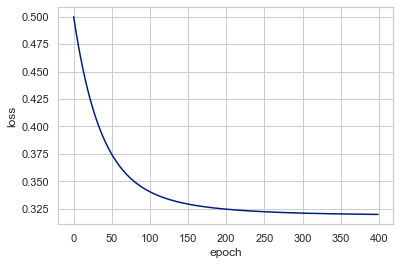

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="notebook", style="whitegrid", palette="dark")

ax = sns.lineplot(x='epoch', y='loss', data=pd.DataFrame({'loss': loss_data, 'epoch': np.arange(epoch)}))
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

plt.show()